In [ ]:
import pandas as pd
df=pd.read_csv("/content/^NSEI.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200.0
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800.0
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100.0
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
df.drop('Adj Close',axis=1,inplace=True)

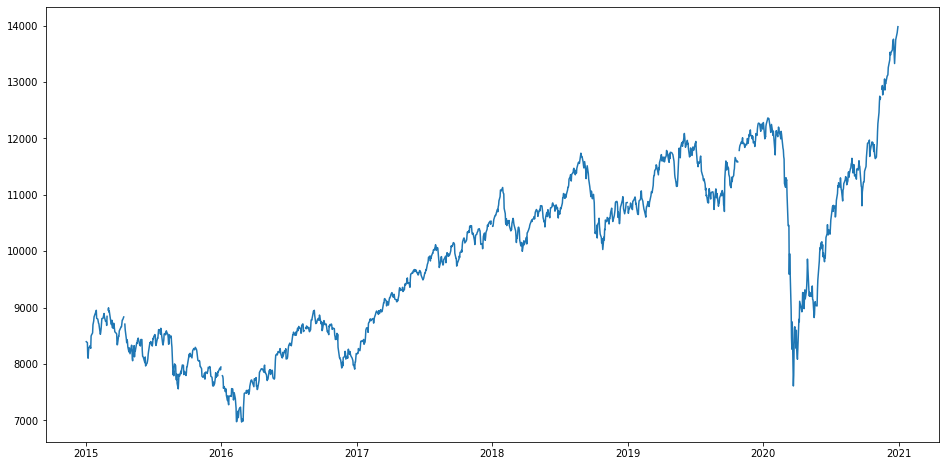

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
y=df['Open']
X=df[['High', 'Low', 'Close', 'Volume']]

In [ ]:
X.isnull().sum()

High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=rescaledX_train,y=y_train.values,
          validation_data=(rescaledX_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
8/8 [==============================] - 1s 28ms/step - loss: 99839288.0000 - val_loss: 100699488.0000
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 99837272.0000 - val_loss: 100697376.0000
Epoch 3/400
8/8 [==============================] - 0s 8ms/step - loss: 99835000.0000 - val_loss: 100694480.0000
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 99831864.0000 - val_loss: 100690536.0000
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 99827568.0000 - val_loss: 100685072.0000
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 99821656.0000 - val_loss: 100677608.0000
Epoch 7/400
8/8 [==============================] - 0s 6ms/step - loss: 99813584.0000 - val_loss: 100667432.0000
Epoch 8/400
8/8 [==============================] - 0s 7ms/step - loss: 99802584.0000 - val_loss: 100653552.0000
Epoch 9/400
8/8 [==============================] - 0s 8ms/step - loss: 99787464.0000 - val_loss: 100634

In [ ]:
losses = pd.DataFrame(model.history.history)

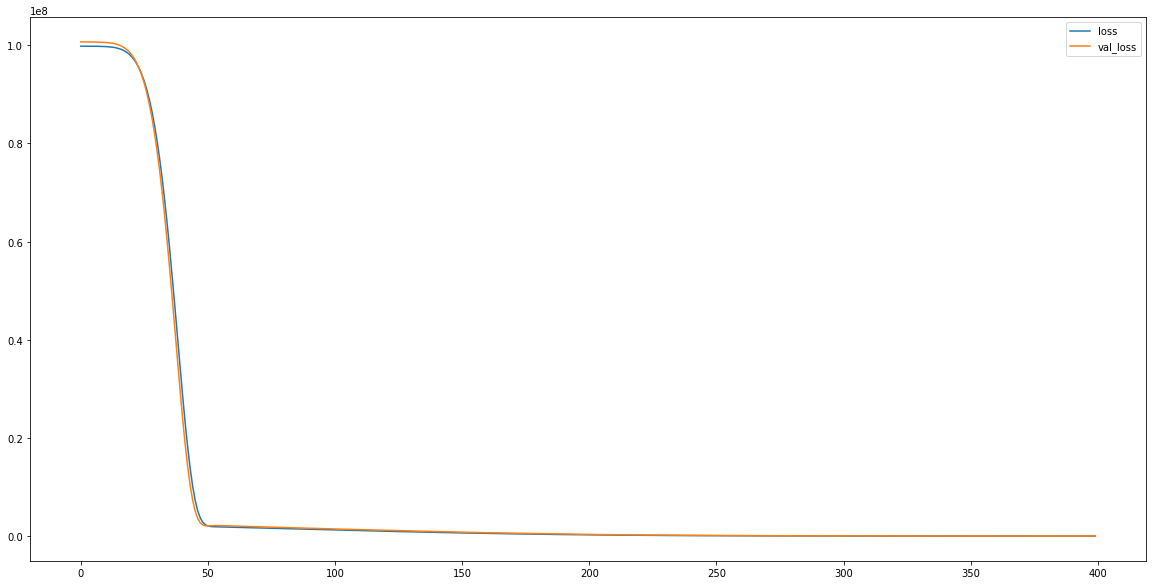

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [ ]:
rescaledX_test

array([[0.42085113, 0.43917237, 0.42159847, 0.13915094],
       [0.02497057, 0.01905775, 0.        , 0.21543337],
       [0.24255266, 0.26591275, 0.24765894, 0.12721108],
       ...,
       [0.59113505, 0.59678375, 0.58483214, 0.47361439],
       [0.21414929, 0.22840822, 0.2127155 , 0.11298644],
       [0.3707233 , 0.38920893, 0.37280171, 0.15713443]])

In [ ]:
predictions = model.predict(rescaledX_test)

In [ ]:
mean_absolute_error(y_test,predictions)

61.115748116023894

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

79.9637064518434

In [ ]:
r2_score(y_test,predictions)

0.9959096307532929

In [ ]:
df.corr()['Open'].sort_values()

Volume    0.503008
Close     0.998266
Low       0.999009
High      0.999164
Open      1.000000
Name: Open, dtype: float64

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


In [ ]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-02,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900.0
2015-01-05,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200.0
2015-01-06,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800.0
2015-01-07,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100.0
2015-01-08,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800.0


In [ ]:
new_data.head()

,Date,Close
0,2015-01-02 00:00:00,8395.45
1,2015-01-05 00:00:00,8378.4
2,2015-01-06 00:00:00,8127.35
3,2015-01-07 00:00:00,8102.1
4,2015-01-08 00:00:00,8234.6


In [ ]:
new_data.shape

(1479, 2)

In [ ]:
train = new_data[:1036]
valid = new_data[1036:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
dataset = new_data.values

train = dataset[0:1036,:]
valid = dataset[1036:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


976/976 - 24s - loss: 0.0022


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

507.7656503818403

In [ ]:
df1=df.reset_index()['Close']

ValueError: ignored